This is a template notebook for the second assignment of MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Failure to comply
may result in unexpected errors that can lead to mark deductions.

As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [1]:
import numpy as np
import pandas as pd
import colorsys
import matplotlib.pyplot as plt

 Instructions 
========================

- The instructions are given in this notebook.   
- Make sure you give your answers in the cells below the question
- Remember that unless specified each plot should have a title and axis labels (and a legend there are multiple lines/plots on the same axis). 
- **Do not delete any cells**
- Make sure you follow the naming of the variables according to the instructions.

 Question 1:
===========================

------
------

For this first question, you will generate the random variable X with the code provided. The result is a 200x4 matrix, where each row represents a 4 dimensional point. In the questions below, we refer to coordinates as the 0th, 1st, 2nd, and 3rd coordinates.

---------


In [3]:
## Run this cell to create the dataset
X = np.random.normal(size=[200,4])


-----------------
-----------------
a.) Create a figure with 3x3 subplots, where the (i,j)-th plot is a scatter plot of the value of the i-th coordinate and the value of the (i+j)-th coordinate. So, counting from coordinates from 0,  the first plot is the 0th and the 1st coordinate, the middle plot (middle row, middle column), will be the 1st coordinate and the 3rd coordinate.
Note that not all plots will be filled, i.e. some of them will be empty.

-----------------


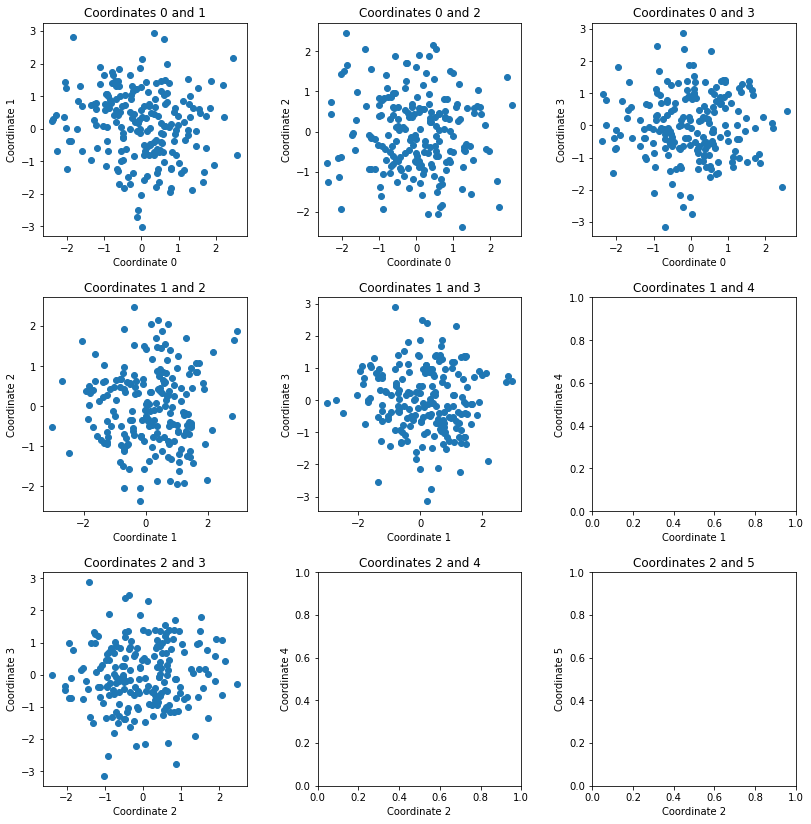

In [4]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
fig.tight_layout(pad=4.0)

for i in range(3):
    for j in range(3):
        axs[i,j].set_title('Coordinates '+ str(i) +' and '+ str(i+j+1))
        axs[i,j].set_xlabel('Coordinate '+ str(i))
        axs[i,j].set_ylabel('Coordinate '+ str(i+j+1))
        try:
            axs[i,j].scatter(X[:,i],X[:,i+j+1])
        except:
            continue


-----------------
-----------------
b.) Compute the minimum, maximum and average of each row and store them in variables caled _mn_, _mx_, and _avg_. Each should be a 200x1 vector. 

-----------------

In [5]:
mn = []
mx = []
avg = []
for i in range(len(X)):
    mn.append([min(X[i])])
    mx.append([max(X[i])])
    avg.append([sum(X[i])/len(X[i])])

mn = np.array(mn)
mx=np.array(mx)
avg=np.array(avg)

-----------------
-----------------
c.) Using Matplotlib, on one axis, plot the following:
- Histograms of the minimum, maximum and average of each row of X
- Each histogram should have 20 bins
- All three histograms are completely visible. 

-----------------

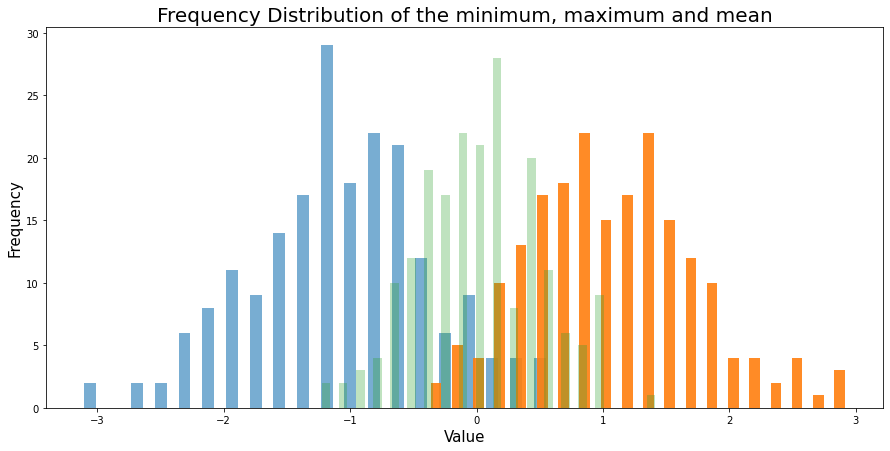

In [8]:
plt.figure(figsize=(15,7))
plt.hist(mn, bins=20, alpha=0.6, rwidth=0.5)
plt.hist(mx, bins=20, alpha=0.9, rwidth=0.5)
plt.hist(avg, bins=20, alpha=0.3, rwidth=0.5)
plt.title('Frequency Distribution of the minimum, maximum and mean',size=20)
plt.xlabel('Value',size=15)
plt.ylabel('Frequency',size=15)
plt.show()

-----------------
-----------------

d.) How many rows in X have all coordinates whose absolute value is smaller than 0.6? Store the answer in a variable called _numpts_. **HINT:** The NumPy function _abs()_ may be useful. 

-----------------

In [14]:
numpts = 0
for i in range(len(X)):
    for j in X[i]:
        if abs(j)>=0.6:
            break
    else:
        numpts+=1
numpts

8

 Question 2:
 =====================================

----------------
----------------
a.) Read in the file **housing.csv** using Pandas into a variable called housing.

----------------

In [16]:
housing = pd.read_csv('housing.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



---------------
---------------
b.) Remove all the columns which have undefined values. After this part, the variable housing should not contain any undefined values. 

----------------

In [17]:
housing.dropna(axis=1,inplace=True)
housing.rename(columns = {'YrSold':'Year Sold'},inplace=True)
housing['Year Sold'] = housing['Year Sold'].astype(str)


---------------
---------------
c.) Draw the normalised histogram of prices which had Normal sales using 50 bins

----------------

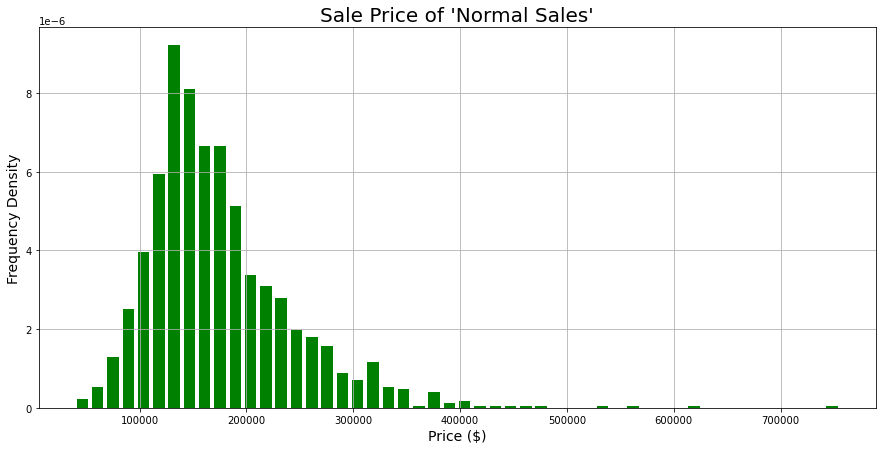

In [18]:
housing[housing['SaleCondition']=='Normal'].hist('SalePrice',bins=50,density=True,color='green',
                                                 figsize=(15,7),rwidth=0.75)

plt.title("Sale Price of 'Normal Sales'",size=20)
plt.ylabel("Frequency Density",size=14)
plt.xlabel("Price ($)",size=14)
plt.show();


---------------
---------------
d.) Create a dataframe called **summary** with the year as the index and columns for the minimum, maximum, and mean of the sales prices for each year
 - the names should be minimum, maximum, and mean

----------------

In [19]:
summary = housing.set_index('Year Sold').sort_index()
summary = summary.groupby(['Year Sold']).agg({'SalePrice':['min','max','mean']})
summary = summary.set_axis(['Minumum','Maximum','Mean'], axis = 1)


---------------
---------------

e.) Plot the minimum, maximum and mean.

---------------

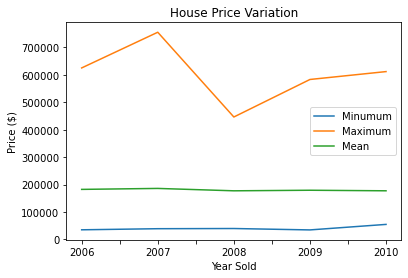

In [20]:
summary.plot(ylabel='Price ($)', title='House Price Variation')
plt.show()


 Question 3:
========================

------------------------------------
------------------------------------
a.)  Read the file  **unemployment.csv** into a dataframe called _unemp_ using Pandas 
- Remove any column or row which does not correspond to a country or date
- All invalid values should be given a value of 0
- All columns except the date name should be numeric while the date should be of type datetime
------------------------------------


In [21]:
unemp = pd.read_csv('unemployment.csv').fillna(0.0).drop(axis=0,index=[0,1]).replace({'..':0.0})
unemp.loc[:, unemp.columns != 'Date'] = unemp.loc[:, unemp.columns != 'Date'].apply(pd.to_numeric)
unemp['Date'] = pd.to_datetime(unemp['Date'])

------------------------------------
------------------------------------
b.) Set the index to the Date

------------------------------------


In [22]:
unemp.set_index('Date',inplace=True)

In [23]:
unemp.head()

,Australia,Austria,Belgium,Canada,Chile,Colombia,Czech Republic,Denmark,Estonia,Finland,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-01,5.1,4.2,5.2,5.6,7.8,10.3,2.0,4.9,4.4,6.8,...,2.9,6.7,5.6,3.8,13.7,6.6,0.0,13.1,3.7,3.5
2020-01-01,5.3,4.4,5.1,5.5,8.1,10.6,2.0,4.9,4.7,6.8,...,3.0,6.8,6.1,4.2,13.8,7.2,0.0,12.6,3.9,3.6
2020-02-01,5.1,4.4,5.0,5.6,8.2,10.8,2.0,4.9,4.7,6.9,...,3.0,6.4,6.1,4.2,13.6,7.6,0.0,12.6,3.9,3.5
2020-03-01,5.2,4.6,5.1,7.8,9.1,12.2,2.1,4.8,4.8,7.0,...,3.0,6.2,5.8,4.3,14.5,6.8,0.0,12.9,3.8,4.4
2020-04-01,6.4,4.7,5.3,13.0,10.9,20.2,2.2,4.9,6.0,7.2,...,3.1,6.3,6.4,4.7,15.3,7.9,0.0,13.6,3.9,14.7


------------------------------------
------------------------------------
c.) Create a line plot corresponding to Canada and Korea using complementary colours (please explicitly make the colours complementary)

------------------------------------

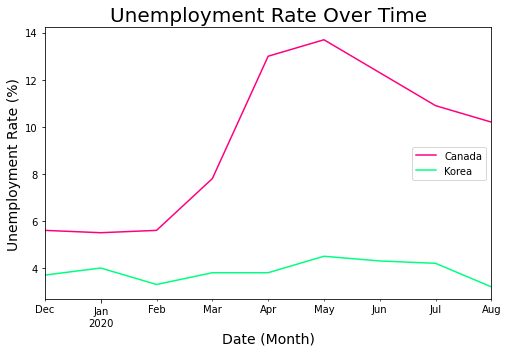

In [25]:
colours = [colorsys.hsv_to_rgb(330/360,1,1),colorsys.hsv_to_rgb(150/360,1,1)]
unemp.plot(y=['Canada','Korea'], use_index=True,figsize = (8,5), color=colours).legend(loc='right')
plt.title('Unemployment Rate Over Time',size=20)
plt.xlabel('Date (Month)',size=14)
plt.ylabel('Unemployment Rate (%)',size=14)
plt.show()


------------------------------------
------------------------------------
d.) Complete the function below which takes in an integer and returns N colours equally spaced in hue (with maximum saturation and value/luminance) as rgb values

------------------------------------


In [26]:
def create_colours(N):
    ''' Takes an integer and creates colours which are equally spaced in hue. 
        Saturation and Luminosity are set to 1.'''
    colours=[]
    angle = 360/N
    for c in range(N):
        colours.append(colorsys.hsv_to_rgb(c*angle/360,1,1))
    return colours        


------------------------------------
------------------------------------
e.) Plot the unemployment rates in 2020 
- include all countries whose names start with a letter which comes before but **not** including F 
- use the colour function you have just written. 

------------------------------------


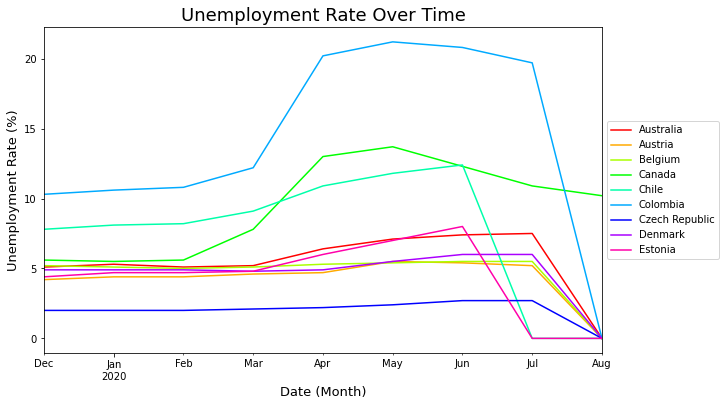

In [27]:
# graph = unemp.iloc[:,0:9] # Alternative Method
graph = unemp.loc[:,'Australia':'Estonia']
# graph = unemp.loc[:,('Australia','Estonia','Finland')]
graph.plot(use_index=True,figsize=(10,6),color=create_colours(len(graph.columns))).legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Unemployment Rate Over Time', size=18)
plt.xlabel('Date (Month)',size=13)
plt.ylabel('Unemployment Rate (%)',size=13)
plt.show()
